In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

# Download Data 

In [3]:
PATH = '/usr/local/data/digit-recognizer'
train = pd.read_csv('{}/train.csv'.format(PATH))
test = pd.read_csv('{}/test.csv'.format(PATH))

# Create Validation Set

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(train, test_size=0.25, random_state=99)
y_test = X_test.label
X_test = X_test.drop('label', axis=1)

# Explore Data

In [5]:
X_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41323,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22823,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7106,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19010,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11167,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


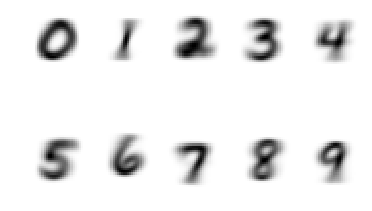

In [6]:
means = X_train.groupby(by='label').mean().values
for i in range(0, 10):
    plt.subplot(2, 5, i + 1)
    plt.axis('off')
    plt.imshow(means[i].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')    

# Test Model

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, X_test.dot(means.T).idxmax(axis=1))

0.6227619047619047

# Submit Predictions

In [158]:
final_predictions = test.dot(means.T).idxmax(axis=1)
final_indices = np.arange(1, final_predictions.size + 1)
final_csv = '{}/submissions/simple_average.csv'.format(PATH)
np.savetxt(final_csv, np.array([final_indices, final_predictions]).transpose(), fmt='%d', header='ImageId,Label', comments='', delimiter=',')

In [156]:
!kaggle competitions submit -c "digit-recognizer" -f "{final_csv}" -m "Simple average value."

Successfully submitted to Digit Recognizer